In [3]:
# Exercise 8.1 Sample from GP prior
# In this exercises we will write the code needed to draw and plot
# samples of f from a Gaussian process prior with squared
# exponential (or, equivalently, RBF) kernel
# f ∼ GP(m, κ), whith m(x) = 0 and 
# κ(x, x0) = (σ_f)²exp(−1/(2l²)||x−x'||²
# To implement this, we choose a vector of abs(m) test input points x∗.
# We will choose x∗ to contain sufficiently many points,
# such that it will appear as a continuous line on the screen.
# We then evaluate the |m × m| covariance matrix κ(x∗, x∗) and
# thereafter generate samples from the multivariate normal distribution.
# f(x∗) ∼ N(m(x∗), κ(x∗, x∗)).
#--------------------------------------------------
#(a)-----------------------------------------------
# Use numpy.linspace to construct a vector x∗ with m = 101 elements 
# equally spaced from -5 to 5.
#(b)-----------------------------------------------
# Construct a mean vector m(x∗) with 101 elements all equal to zero
# and the 101 × 101 covariance matrix κ(x∗, x∗).
# The expression for κ(·, ·) is given above. Let the hyperparameters
# be l = 2 and (σ_f)² = 1.
#(c)-----------------------------------------------
# Use scipy.stats.multivariate_normal (you might need to use the option
# allow_singular=True) to draw 25 samples f(1)(x∗), . . . f(25)(x∗)
# from the multivariate normal distribution f(x∗) ∼ N(m(x∗), κ(x∗, x∗))
# (d)-----------------------------------------------
# Plot the samples f(1)(x∗), . . . f(25)(x∗) versus the input vector x∗.
# (e)-----------------------------------------------
# Try another value of l and repeat (b)-(d). How do the two plots differ, and why?

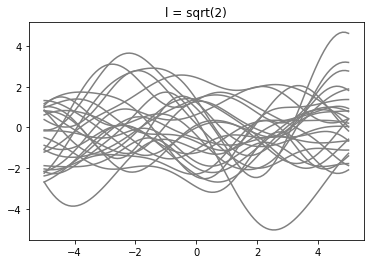

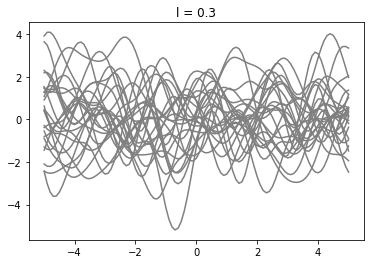

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

m = 101
xs = np.linspace(-5,5,m) # test input vector
mxs = np.zeros(m) # zero mean vector

# hyperparameters
l = np.sqrt(2)
sigf2 = 2
# covariance matrix
Kss = sigf2*np.exp(-1/(2*l**2)*np.abs(xs[:,np.newaxis]-xs[:,np.newaxis].T)**2)
# draw samples from the prior
s = 25
fs = multivariate_normal(mean=mxs,cov=Kss,allow_singular=True).rvs(s).T

# plot the samples
plt.plot(xs,fs,'gray')
plt.title('l = sqrt(2)')
plt.show()

# use another lenght scale
l = 0.3
Kss = sigf2*np.exp(-1/(2*l)*np.abs(xs[:,np.newaxis]-xs[:,np.newaxis].T)**2)
fs = multivariate_normal(mean=mxs,cov=Kss,allow_singular=True).rvs(s).T
plt.plot(xs,fs,'gray')
plt.title('l = 0.3')
plt.show()

In [10]:

# Exercise 8.2 GP posterior
# In this exercise we will perform Gaussian process regression.
#That means, based on the n observations D = {xi, f(xi)} from i=1 to n
# and the prior belief f ∼ GP(0, κ(x, x')), we want to find the posterior p(f|D).
# (In the previous problem, we were only
# concerned with the prior p(f), not conditioned on having observed the data D.)
# We consider the same Gaussian process prior 
# same mean m(x) and κ(x, x0) and hyperparameters)
# as in the previous exercise.

#(a)
# Construct two vectors x = [−4, −3, −1, 0, 2].T 
# and f = [−2, 0, 1, 2, −1].T, which will be our training data 
#(that is, n = 5).

#(b)
# Keep x∗ as in the previous problem. In addition to the m × m matrix κ(x∗, x∗),
# now also compute the n × m matrix κ(x, x∗) and the n × n matrix κ(x, x).
# Hint: You might find it useful to define a function that returns κ(x, x0),
# taking x and x' as arguments.

#(c)
# Use the training data x, y and the matrices constructed in (b) to compute
# the posterior mean µ_posterior and the posterior covariance K_posterior for x∗,
# by using the equations for conditional multivariate normal distributions.

#(d)
# In a similar manner as in (c) and (d) in the previous problem,
# draw 25 samples from the multivariate distribution
# f(x∗) ∼ N(µ_posterior, K_posterior)
# and plot these samples (f(j)(x∗) vs. x∗) together with the posterior 
# mean (µ_posterior vs. x∗) and the actual measurements (y vs. x).
# How do the samples in this plot differ from the prior samples in the previous problem?

#(e)
# Instead of plotting samples, plot a credibility region.
# Here, a credibility region is based on the (marginal) posterior variance.
# The 68% credibility region, for example, is the area between 
# µ_posterior −sqrt(K_posterior) and µ_posterior +sqrt(K_posterior),
# where K_posterior is a vector with the diagonal elements of K_posterior.
# What is the connection between the credibility regions and the samples you drew previously?

#(f)
# Now, consider the setting where the measurements are corrupted with noise,
# yi = f(xi) + ε, ε ∼ N(0, σ2)
# Use σ = 0.1 and repeat (c)-(e) with this modification of the model.
# What is the difference in comparison to the previous plot? What is the interpretation?

#(g)
# Explore what happens with another length scale l

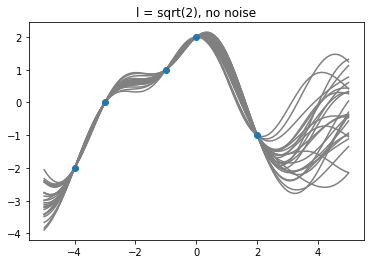

/usr/lib/python3/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in sqrt
/usr/lib/python3/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in sqrt
/usr/lib/python3/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in sqrt
/usr/lib/python3/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in sqrt
/usr/lib/python3/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in sqrt
/usr/lib/python3/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in sqrt


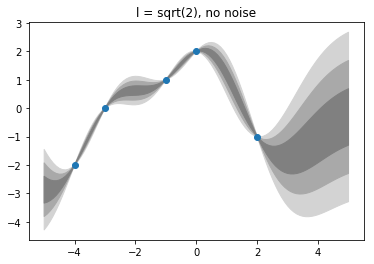

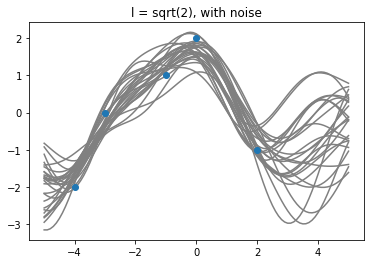

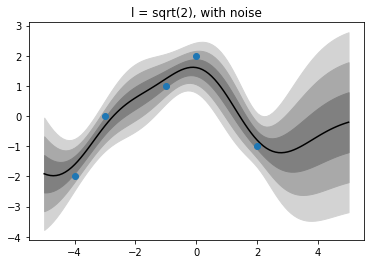

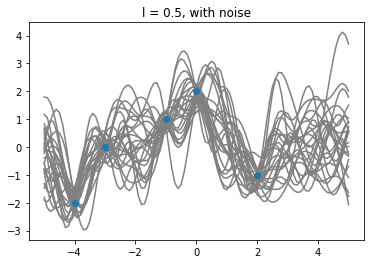

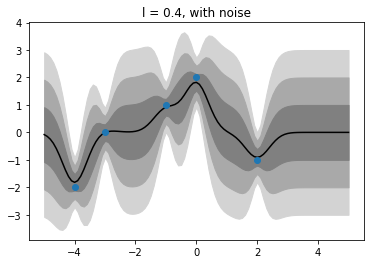

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

n = 5
x = np.array([-4,-3,-1,0,2]) # observed inputs
f = np.array([-2,0,1,2,-1]) # observed function values

m = 101
xs = np.linspace(-5,5,m) # test input vector

# hyperparameters
l = np.sqrt(2)
sigf2 = 1
def k(x,xp,l):
    return sigf2*np.exp(-1/(2*l**2)*np.abs(x[:,np.newaxis]-xp[:,np.newaxis].T)**2)

Kss = k(xs,xs,l)
Ks = k(x,xs,l)
K = k(x,x,l)

mu_post = (Ks.T@np.linalg.inv(K))@f #
K_post = Kss - Ks.T@np.linalg.inv(K)@Ks #

# draw samples from the prior
s = 25
fs = multivariate_normal(mean=mu_post,cov=K_post,allow_singular=True).rvs(s).T

# plot the samples
plt.plot(xs,fs,'gray')
plt.scatter(x,f,zorder=3)
plt.title('l = sqrt(2), no noise')
plt.show()

# plot credibility regions
plt.fill_between(xs,mu_post+3*np.sqrt(np.diag(K_post)),
                     mu_post-3*np.sqrt(np.diag(K_post)),
                     color='lightgray')
plt.fill_between(xs,mu_post+2*np.sqrt(np.diag(K_post)),
                    mu_post-2*np.sqrt(np.diag(K_post)),
                    color='darkgray')
plt.fill_between(xs,mu_post+1*np.sqrt(np.diag(K_post)),
                    mu_post-1*np.sqrt(np.diag(K_post)),
                    color='gray')
plt.scatter(x,f,zorder=3)
plt.title('l = sqrt(2), no noise')
plt.show()

# include measurement noise
K = k(x,x,l) + 0.1*np.eye(n)
mu_post = (Ks.T@np.linalg.inv(K))@(f)
K_post = Kss - Ks.T@np.linalg.inv(K)@Ks #
fs = multivariate_normal(mean=mu_post,cov=K_post,allow_singular=True).rvs(s).T

# plot the samples
plt.plot(xs,fs,'gray')
plt.scatter(x,f,zorder=3)
plt.title('l = sqrt(2), with noise')
plt.show()

# plot credibility regions
plt.plot(xs,mu_post,'black')
plt.fill_between(xs,mu_post+3*np.sqrt(np.diag(K_post)),
                    mu_post-3*np.sqrt(np.diag(K_post)),
                    color='lightgray')
plt.fill_between(xs,mu_post+2*np.sqrt(np.diag(K_post)),
                    mu_post-2*np.sqrt(np.diag(K_post)),
                    color='darkgray')
plt.fill_between(xs,mu_post+1*np.sqrt(np.diag(K_post)),
                    mu_post-1*np.sqrt(np.diag(K_post)),
                    color='gray')
plt.scatter(x,f,zorder=3)
plt.title('l = sqrt(2), with noise')
plt.show()

# try another length scale
l = 0.4
Kss= k(xs,xs,l)
Ks = k(x,xs,l)
K = k(x,x,l) + 0.1*np.eye(n)
mu_post = (Ks.T@np.linalg.inv(K))@(f)
K_post = Kss - Ks.T@np.linalg.inv(K)@Ks
fs = multivariate_normal(mean=mu_post,cov=K_post,allow_singular=True).rvs(s).T
plt.plot(xs,fs,'gray')
plt.scatter(x,f,zorder=3)
plt.title('l = 0.5, with noise')
plt.show()

# plot credibility regions
plt.plot(xs,mu_post,'black')
plt.fill_between(xs,mu_post+3*np.sqrt(np.diag(K_post)),
                    mu_post-3*np.sqrt(np.diag(K_post)),
                    color='lightgray')
plt.fill_between(xs,mu_post+2*np.sqrt(np.diag(K_post)),
                    mu_post-2*np.sqrt(np.diag(K_post)),
                    color='darkgray')
plt.fill_between(xs,mu_post+1*np.sqrt(np.diag(K_post)),
                    mu_post-1*np.sqrt(np.diag(K_post)),
                    color='gray')
plt.scatter(x,f,zorder=3)
plt.title('l = 0.4, with noise')
plt.show()